In [37]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor


In [38]:
random_seed = np.random.seed(2021)

In [39]:
data = pd.read_csv('data_feat_extracted.csv', index_col=0)

In [40]:
dummies = pd.get_dummies(data)

I fit a decision tree model to assess the importance of each feature [see here](https://datascience.stackexchange.com/questions/45729/how-to-measure-correlation-between-several-categorical-features-and-a-numerical) and [here](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html)


In [41]:
X = dummies.drop('price', axis=1)
y = dummies['price']

In [42]:
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=random_seed)

forest.fit(X, y)

ExtraTreesClassifier(n_estimators=250)

In [43]:
importances = forest.feature_importances_
std = np.std([forest.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

<BarContainer object of 527 artists>

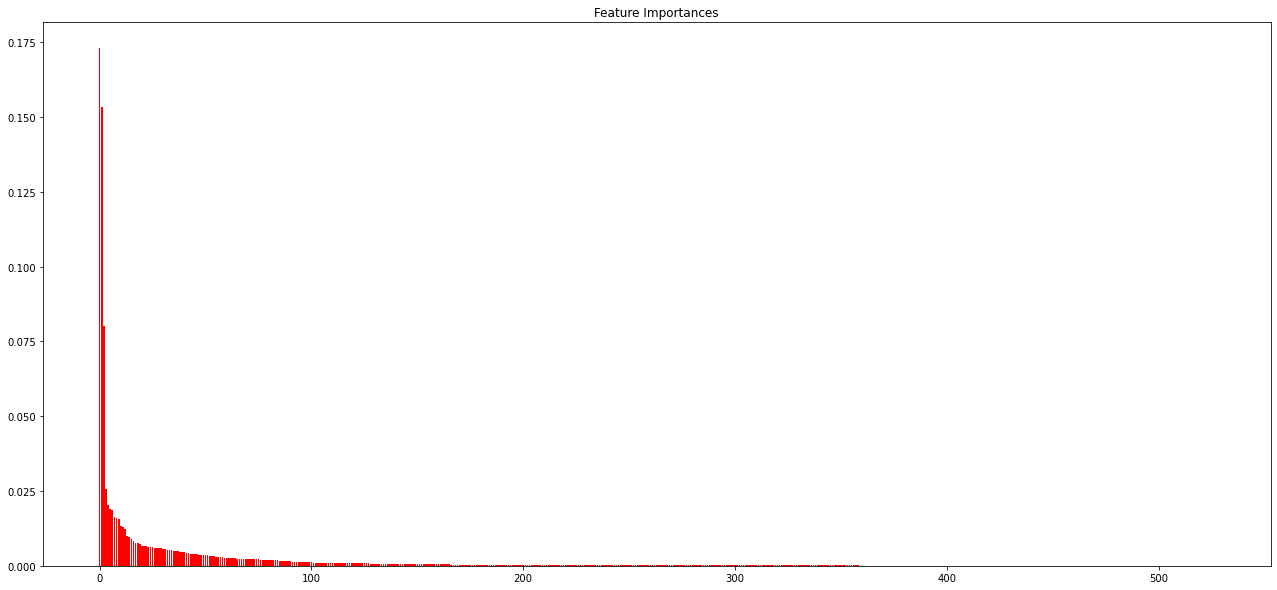

In [44]:
plt.figure(figsize=(22,10))

plt.title('Feature Importances')
plt.bar(range(X.shape[1]), 
        importances[indices],
        color="r", 
        yerr=std[indices], 
        align="center")

In [45]:
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 1 (0.173090)
2. feature 2 (0.153353)
3. feature 0 (0.080126)
4. feature 516 (0.025686)
5. feature 510 (0.020491)
6. feature 511 (0.019084)
7. feature 524 (0.018506)
8. feature 491 (0.016380)
9. feature 518 (0.015922)
10. feature 513 (0.015499)
11. feature 498 (0.013462)
12. feature 508 (0.012808)
13. feature 503 (0.012375)
14. feature 507 (0.010084)
15. feature 522 (0.009703)
16. feature 342 (0.008966)
17. feature 512 (0.008265)
18. feature 407 (0.007667)
19. feature 506 (0.007463)
20. feature 487 (0.007275)
21. feature 415 (0.006741)
22. feature 457 (0.006633)
23. feature 519 (0.006606)
24. feature 411 (0.006448)
25. feature 504 (0.006220)
26. feature 337 (0.006133)
27. feature 488 (0.006113)
28. feature 462 (0.005997)
29. feature 442 (0.005966)
30. feature 501 (0.005785)
31. feature 451 (0.005692)
32. feature 333 (0.005691)
33. feature 414 (0.005400)
34. feature 521 (0.005320)
35. feature 452 (0.005280)
36. feature 494 (0.005113)
37. feature 391 (0.004934)

In [46]:
#5 'most important' features according to the ExtraTreesClassifier model (in order most-least)

important_feats = X.iloc[:, [1, 2, 0, 516, 510]]
important_feats

,bedrooms,bathrooms,living_rooms,tags_none,tags_garden
0,1.0,1.0,1.0,1,0
1,3.0,4.0,1.0,0,0
2,4.0,4.0,3.0,1,0
3,2.0,1.0,2.0,0,0
4,6.0,6.0,4.0,1,0
...,...,...,...,...,...
8163,7.0,6.0,4.0,0,0
8164,4.0,4.0,1.0,1,0
8165,8.0,6.0,4.0,0,0
8166,3.0,3.0,1.0,1,0


So, whether the property:

- has a certain number of bedrooms, bathrooms or living rooms
- has no amenities (that are visible on the search page of primelocation.co.uk)
- has the tag 'garden'

are 'important' factors according to the ExtraTreesClassifier model when deciding where to rent. 

However, even the most important features decided by the model have a low feature-importance. This will inevitably result in less than ideal predictions by the final model as the data doesn't seem to follow the features that well given the unstructured nature of the sample. Given a much larger sample size (i.e. scraping multiple websites which have enough data and are allowed to scrape) it might be possible to attempt to somewhat accurately predict rent prices in England.